In [0]:
import numpy as np
import collections
import cv2
import math
from PIL import Image, ImageDraw
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as Image



**A1) Image Smoothing**

---



**A1 a) Box Filter**

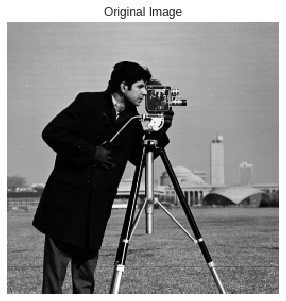

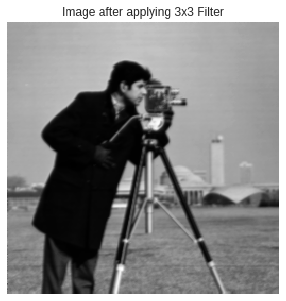

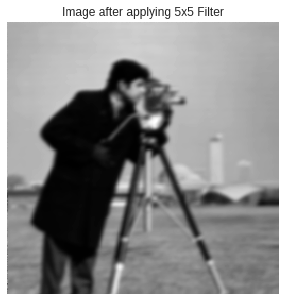

In [63]:
# Box Filter Implementation
def image_smoothing(image,kernelBox) :
    for row in range(image.shape[0] - 1):
         for column in range(image.shape[1] - 1):
                  image[row+1,column+1] = np.mean(image[row:row + kernelBox, column:column + kernelBox])
    return(image)

#Original Image
inputImage = cv2.imread("b2_a.png",0)
fig = plt.figure(figsize=(5,5))
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Original Image')
plt.show()

# 3x3 Box Filter
output_3x3 = image_smoothing(inputImage,3)
fig = plt.figure(figsize=(5,5))
plt.imshow(output_3x3,cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Image after applying 3x3 Filter')
plt.show()

# 5x5 Box Filter
output_5x5 = image_smoothing(inputImage,5)
fig = plt.figure(figsize=(5,5))
plt.imshow(output_5x5,cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Image after applying 5x5 Filter')
plt.show()



In [5]:
cv2.imwrite( "filtered.jpg", output_5x5)


True

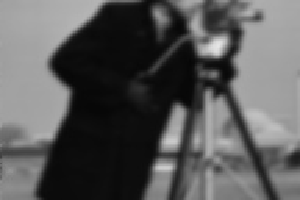

In [6]:
from PIL import Image

image5x5 = Image.open('filtered.jpg')
newImage = image5x5.resize((400, 400))
newImage.save('newImage_400.jpg')
box = (0, 100, 300, 300)
croppedImage = newImage.crop(box)
croppedImage.save('cropped_image.jpg')
croppedImage

**A1 b) Gaussian Filtering**

In [0]:
img = cv2.imread('b2_a.png',cv2.IMREAD_GRAYSCALE)


In [0]:
height = img.shape[0]
width = img.shape[1]
gauss = [0.03, 0.07, 0.12,0.18, 0.20, 0.18,0.12, 0.07, 0.03]

#Horizontal Direction
for i in np.arange(4,height-4):
  for j in np.arange(4,width-4):
    sum1 = 0
    for k in np.arange(-4,4):
      a = img.item(i,j+k)
      b = gauss[4+k]
      sum1 = sum1 + (a*b)
    b =sum1
    #print(b)
    img.itemset((i,j),b)
img1 = img.copy()

#Vertical Direction
for i in np.arange(4,height-4):
  for j in np.arange(4,width-4):
    sum1 = 0
    for k in np.arange(-4,4):
      a = img1.item(i+k,j)
      b = gauss[4+k]
      sum1 = sum1 + (a*b)
    b =sum1
    #print(b)
    img1.itemset((i,j),b)
img2 = img1.copy()

In [0]:
#Collab Code to plot using cv2

import cv2
import numpy as np
import PIL
from IPython.display import display

def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))


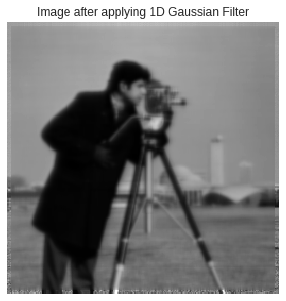

In [10]:
fig = plt.figure(figsize=(5,5))
plt.imshow(img2,cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.title('Image after applying 1D Gaussian Filter')
plt.show()

**A1 c) Edge Detection by Laplacian**

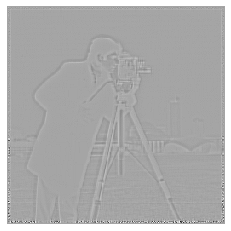

In [69]:
#Laplacian Filter

laplacianFilter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
width = int(laplacianFilter.shape[1]/2)
height = int(laplacianFilter.shape[0]/2)
copy = np.zeros(shape=(img2.shape[0],img2.shape[1]))

def Laplacian(inputImage,kernelLaplacian):
  for row in range(height,inputImage.shape[0] - height):
    for column in range(width,inputImage.shape[1] - width):
      result = np.sum(np.multiply(inputImage[row - height:row + height+1, column-width:column+width+1],kernelLaplacian))
      copy[row,column]=result
  return(copy)

final = Laplacian(img2,laplacianFilter)
final1 = final.copy()

plt.xticks([]), plt.yticks([])
plt.imshow(final1)

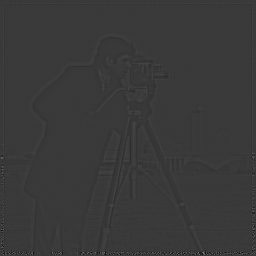

In [70]:
#Scaling the image in the range[0-128]

x = max(max(x) for x in final1)
y = min(min(x) for x in final1)
value = x - y
#print(value)

for i in range(len(final1)):
  for j in range(len(final1)):
    a = final1[i][j]
    val = ((a - y)/value)*128
    final1[i][j] = val
#print(final)
#plt.xticks([]), plt.yticks([])
#plt.imshow(final1)
cv2_imshow(final1)

In [0]:
#After Thresholding the image

for i in range(len(final)):
  for j in range(len(final[i])):
    if(final[i][j] < 0):
      final[i][j] = 0
    else:
      final[i][j] = 1


[[255. 255. 255. ... 255. 255. 255.]
 [255.   0. 255. ... 255. 255. 255.]
 [255. 255. 255. ...   0.   0. 255.]
 ...
 [255. 255. 255. ...   0. 255. 255.]
 [255.   0.   0. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


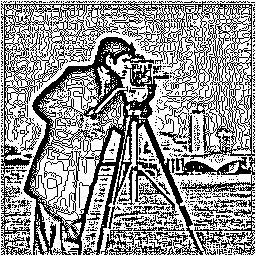

In [72]:
#Scaling the thresholded Image to [0-255]

x = max(max(x) for x in final)
y = min(min(x) for x in final)
value = x - y
#print(value)

for i in range(len(final)):
  for j in range(len(final)):
    a = final[i][j]
    val = ((a - y)/value)*255
    final[i][j] = val
print(final)
#plt.imshow(final)
cv2_imshow(final)

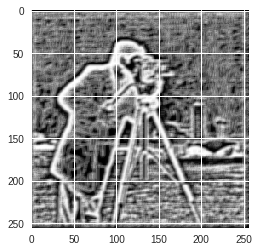

In [58]:
#Applied Box filter to remove the noise

x= image_smoothing(final2,5)
plt.imshow(x)

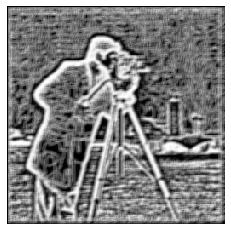

In [61]:
#Edge Map

for i in range(len(final2)-1):
  for j in range(len(final2[i])-1):
    if(final2[i][j] == 1):
      if((final2[i-1][j] + final2[i+1][j] + final2[i][j-1] + final2[i][j+1] + final2[i][j] + final2[i-1][j-1] + final2[i+1][j+1] + final2[i-1][j+1] + final2[i+1][j-1]) != 9):
        final2[i][j] = 1
        #print(posMaskImage[i][j])
      else:
        final2[i][j] = 0
    
plt.imshow(final2)
plt.xticks([]), plt.yticks([])
plt.show() 
    

**Object Detection by Template Matching**

In [0]:
orignalImage = cv2.imread("multiple-keys.png",0)
keyImage1 = cv2.imread("new-key.png",0)

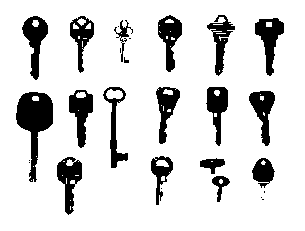

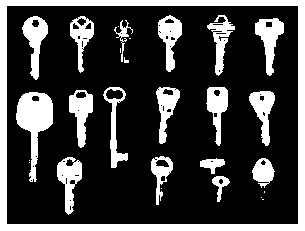

In [30]:
#Thresholding the original image 
ret,thresh1 = cv2.threshold(orignalImage,180,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

for i in range(len(thresh1)):
  for j in range(len(thresh1[i])):
    if(thresh1[i][j] < 180):
      thresh1[i][j] = 0
    else:
      thresh1[i][j] = 1
      
plt.imshow(thresh1)
plt.xticks([]), plt.yticks([])
plt.show()

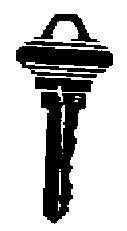

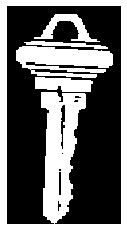

In [31]:
#Thresholding the template image  

ret,thresh3 = cv2.threshold(keyImage1,180,255,cv2.THRESH_BINARY)
plt.imshow(thresh3,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

for i in range(len(thresh3)):
  for j in range(len(thresh3[i])):
    if(thresh3[i][j] < 180):
      thresh3[i][j] = 1
    else:
      thresh3[i][j] = -1
      
plt.imshow(thresh3)
plt.xticks([]), plt.yticks([])
plt.show()


In [36]:
thresh3.shape

(163, 85)

In [0]:
#Correlation between the image-keys and the choosen template

#we take the mean of kernel
meanKey = np.mean(thresh3)
#then subtract it from each element
subMeanKey = np.subtract(thresh3,meanKey)

#Inintilaize the output matrix by zeros
imageFinal = np.zeros(shape=(len(thresh1)-len(thresh3),len(thresh1[0])-len(thresh3[0])))
for row in range(len(thresh1)-len(thresh3)):
    for col in range(len(thresh1[0])-len(thresh3[0])):
        meanOfFilter = np.mean(thresh1[row:row+len(thresh3),col:col+len(thresh3[0])])
        #print(meanOfFilter)
        subMatrix = np.subtract(thresh1[row:row+len(thresh3),col:col+len(thresh3[0])],meanOfFilter)
        #print(subMatrix)
        imageFinalTeamp= np.sum(np.multiply(subMatrix,subMeanKey))
        #print(imageFinalTeamp)
        imageFinal[row,col] = np.divide(imageFinalTeamp,(math.pow(np.sum(np.square(subMatrix)), 0.5)*math.pow(np.sum(np.square(subMeanKey)), 0.5)))
            
        

In [0]:
#Scaling the image in the range[0-255]

x = max(max(x) for x in imageFinal)
y = min(min(x) for x in imageFinal)
value = x - y
#print(value)

for i in range(len(imageFinal)):
  for j in range(len(imageFinal[i])):
    a = imageFinal[i][j]
    val = ((a - y)/value)*255
    imageFinal[i][j] = val
  

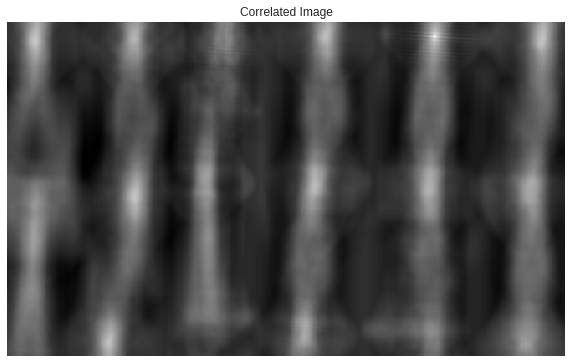

In [34]:
#Plotting the scaled image

f = plt.figure(figsize=(10,10))
plt.title("Correlated Image")
plt.imshow(imageFinal, cmap = plt.get_cmap('gray'))
plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
  #Finding the maximum peak value and it's location

maxPeak = max(max(x) for x in imageFinal)
print(maxPeak)

bright = np.where(imageFinal == maxPeak)
bright

255.0


(array([17]), array([511]))

**The point in the image which has the brightest intensity i.e. 255 is at point (17,511)**